In [1]:
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from collections import defaultdict
import pandas as pd

In [2]:
data = []
with open("post_process/test.txt", "rt") as f:
    for line in f:
        data.append(line.strip().split(","))
data[:5]

[['0', '0', '3720.0', '1252.9998', '120.0', '906.99912'],
 ['0', '0', '3182.9990399999997', '412.99956', '384.0', '700.9999200000001'],
 ['0', '0', '3450.00192', '433.00008', '288.0', '618.99984'],
 ['0', '0', '1093.998144', '340.99920000000003', '271.999872', '471.00096'],
 ['1', '0', '3720.0', '1250.99964', '120.0', '908.99928']]

In [3]:
from collections import defaultdict

group_frames = defaultdict(list)

for d in data:
    group_frames[int(d[0])].append(int(d[1]))
group_frames

defaultdict(list,
            {0: [0, 0, 0, 0],
             1: [0, 0, 0, 0],
             2: [0, 0, 0, 0],
             3: [0, 0, 0, 0],
             4: [0, 0, 0, 0],
             5: [0, 0, 0, 0],
             6: [0, 0, 0, 0],
             7: [0, 0, 0, 0],
             8: [0, 0, 0, 0],
             9: [0, 0, 0, 0],
             10: [0, 0, 0, 0],
             11: [0, 0, 0, 0],
             12: [0, 0, 0, 0],
             13: [0, 0, 0, 0],
             14: [0, 0, 0, 0],
             15: [0, 0, 0, 0],
             16: [0, 0, 0, 0],
             17: [0, 0, 0, 0],
             18: [0, 0, 0, 0],
             19: [0, 0, 0, 0],
             20: [0, 0, 0, 0],
             21: [0, 0, 0, 0],
             22: [0, 0, 0, 0],
             23: [0, 0, 0, 0],
             24: [0, 0, 0, 0],
             25: [0, 0, 0, 0, 0],
             26: [0, 0, 0, 0, 0],
             27: [0, 0, 0, 0, 0],
             28: [0, 0, 0, 0, 0],
             29: [0, 0, 0, 0, 0],
             30: [0, 0, 0, 0, 0],
             

In [4]:
vis_data = {k:len(v) for k, v in group_frames.items()}
vis_data

{0: 4,
 1: 4,
 2: 4,
 3: 4,
 4: 4,
 5: 4,
 6: 4,
 7: 4,
 8: 4,
 9: 4,
 10: 4,
 11: 4,
 12: 4,
 13: 4,
 14: 4,
 15: 4,
 16: 4,
 17: 4,
 18: 4,
 19: 4,
 20: 4,
 21: 4,
 22: 4,
 23: 4,
 24: 4,
 25: 5,
 26: 5,
 27: 5,
 28: 5,
 29: 5,
 30: 5,
 31: 5,
 32: 5,
 33: 5,
 34: 4,
 35: 5,
 36: 5,
 37: 6,
 38: 5,
 39: 5,
 40: 5,
 41: 5,
 42: 5,
 43: 5,
 44: 5,
 45: 5,
 46: 5,
 47: 5,
 48: 5,
 49: 5,
 50: 5,
 51: 5,
 52: 5,
 53: 5,
 54: 5,
 55: 5,
 56: 5,
 57: 5,
 58: 5,
 59: 5,
 60: 5,
 61: 5,
 62: 5,
 63: 5,
 64: 5,
 65: 5,
 66: 5,
 67: 5,
 68: 5,
 69: 5,
 70: 5,
 71: 5,
 72: 5,
 73: 5,
 74: 5,
 75: 5,
 76: 5,
 77: 5,
 78: 5,
 79: 5,
 80: 5,
 81: 5,
 82: 5,
 83: 5,
 84: 5,
 85: 5,
 86: 5,
 87: 5,
 88: 5,
 89: 5,
 90: 5,
 91: 5,
 92: 5,
 93: 5,
 94: 5,
 95: 5,
 96: 5,
 97: 5,
 98: 5,
 99: 5,
 100: 5,
 101: 5,
 102: 5,
 103: 5,
 104: 6,
 105: 6,
 106: 5,
 107: 5,
 108: 4,
 109: 4,
 110: 5,
 111: 6,
 112: 5,
 113: 6,
 114: 6,
 115: 6,
 116: 6,
 117: 6,
 118: 6,
 119: 6,
 120: 4,
 121: 4,
 122: 4,
 12

In [5]:
dup = []
for k, v in vis_data.items():
    for idx in range(v):
        dup.append(k)

In [6]:
group_count = defaultdict(int)
for k, v in vis_data.items():
    group_count[v] += 1
group_count

defaultdict(int, {4: 190, 5: 167, 6: 41, 3: 21, 7: 19, 8: 2})

In [7]:
np.asarray(list(group_count.keys()))

array([4, 5, 6, 3, 7, 8])

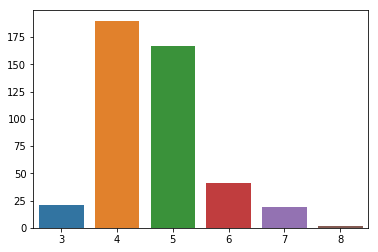

In [8]:


sns.barplot(x=np.asarray(list(group_count.keys())), y=np.asarray(list(group_count.values())))

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from collections import defaultdict
import re 
from post_process import *

pattern = r"(NVR.+?)\/"

def vis_obj_count(files, channel_file, ignore_region=False):
    info = get_channel_info(channel_file) # get info about frame size and ignore region of this channel
    
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{}'.format(int(p.get_height()))
            ax.text(_x, _y, value, ha="center") 
    
    def handler(file):
        data = []
        spliter = None
        with open(file, "rt") as f:
            for line in f:
                if(spliter is None):
                    spliter = " " if len(line.split(" ")) > 3 else ","
                line = line.strip().split(spliter)
                
                if(ignore_region):
                    if(filter_region(line, info, 'iou')):
                        continue
                        
                data.append(line)
                
        group_frames = defaultdict(int)
        for d in data:
            group_frames[int(d[0])] += 1

        group_count = defaultdict(int)
        for k, v in group_frames.items():
            group_count[v] += 1



        num_peoples = np.asarray(list(group_count.keys()))
        num_frames = np.asarray(list(group_count.values()))
    
        mean = np.sum(num_peoples * num_frames) / np.sum(num_frames)
        print("Mean: ", mean)
        
        return (num_peoples, num_frames, mean)
    
    if(not isinstance(files, list)):
        files = [files]
        
    vis_data = []
    for file in files:
        vis_data.append(handler(file))
    
    ncols = 2
    tmp = len(files) / ncols
    if(int(tmp) < tmp):
        nrows = int(tmp) + 1
    else:
        nrows = int(tmp)
    
    fig, axes = plt.subplots(nrows, ncols ,figsize=(25, nrows * 5), squeeze=False)
    for i in range(nrows):
        for j in range(ncols):
            index = i*ncols + j
            if index < len(files):
                num_peoples, num_frames, mean = vis_data[index]

                sns.barplot(x=num_peoples, y=num_frames, capsize=.2, ax=axes[i, j])

                title_name = re.findall(pattern, str(files[index]))
                if(len(title_name) == 1):
                    title_name = title_name[0]
                else:
                    title_name = str(file)

                axes[i, j].set_title(title_name + " " + "- Mean " + str(mean))
                #ax.set(xlabel='Number of humans', ylabel='Number of frames')
                #plt.figure(figsize=(30, 30))

                _show_on_single_plot(axes[i, j])
            else:
                axes[i, j].set_axis_off()
    plt.show()


Mean:  4.665909090909091


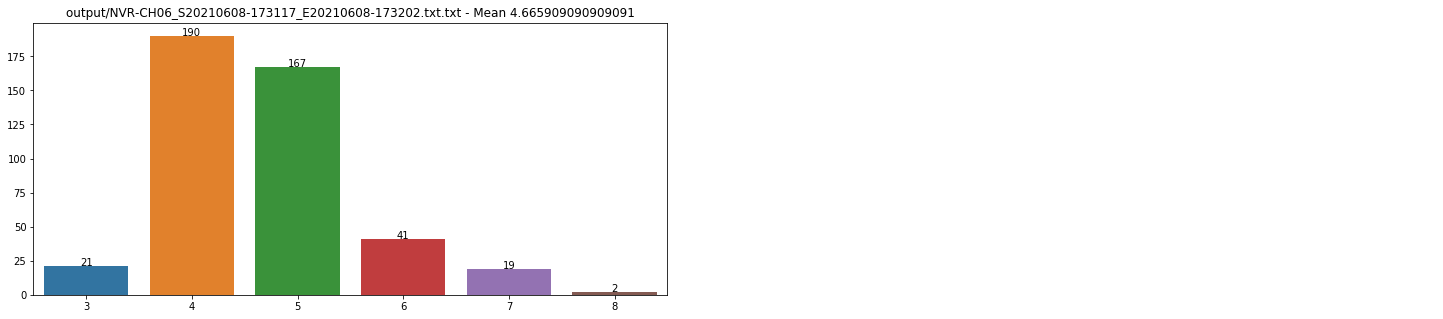

In [10]:
vis_obj_count("output/NVR-CH06_S20210608-173117_E20210608-173202.txt.txt", "static/ignore_region/CH06.json")

Mean:  4.011363636363637


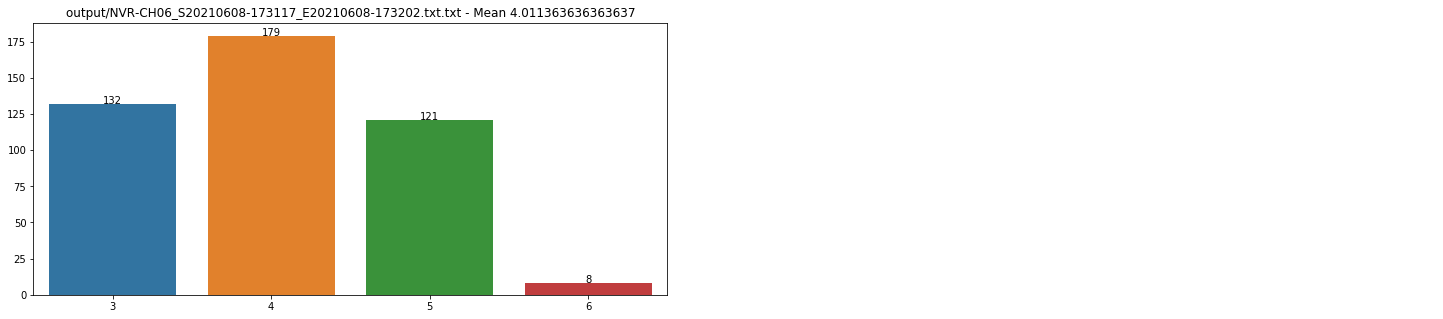

In [11]:
vis_obj_count("output/NVR-CH06_S20210608-173117_E20210608-173202.txt.txt", "static/ignore_region/CH06.json", True)

In [12]:
!ls

output	post_process  README.md  static  task-count-people.ipynb


In [13]:
choosed_video = pd.read_csv('static/Choosed video.csv')
choosed_video.head()

,Name,Channel,Start_day,Start_time,End_day,End_time,Frames,CD,Filter frame,Durations
0,NVR-CH06_S20210608-173117_E20210608-173202.mp4,6,2021-08-06,17:31:17,08/06/2021,17:32:02,441,0,False,0:00:45
1,NVR-CH06_S20210609-111136_E20210609-111336.mp4,6,2021-09-06,11:11:36,09/06/2021,11:13:36,1201,0,True,0:02:00
2,NVR-CH06_S20210608-115756_E20210608-115819.mp4,6,2021-08-06,11:57:56,08/06/2021,11:58:19,201,0,False,0:00:23
3,NVR-CH06_S20210608-112822_E20210608-112924.mp4,6,2021-08-06,11:28:22,08/06/2021,11:29:24,641,0,False,0:01:02
4,NVR-CH06_S20210608-174701_E20210608-174739.mp4,6,2021-08-06,17:47:01,08/06/2021,17:47:39,361,0,False,0:00:38


In [14]:
choosed_video.shape

(92, 10)

In [15]:
videos_name = choosed_video["Name"].apply(lambda x: x.split(".")[0]).values

In [16]:
from pathlib import Path

paths = []
for path in Path('output').rglob('*.txt'):
    #if("gt" in path.name):
    v_name = str(path).split("/")[-1].split(".")[0]
    if(v_name in videos_name):
        print(v_name)
        paths.append(path)
    #print(re.findall(pattern, str(path)))

NVR-CH06_S20210608-173117_E20210608-173202
NVR-CH06_S20210609-113423_E20210609-113506
NVR-CH06_S20210608-181342_E20210608-181427
NVR-CH06_S20210608-081721_E20210608-082317
NVR-CH06_S20210609-182158_E20210609-182249
NVR-CH06_S20210608-173044_E20210608-173106
NVR-CH06_S20210609-083517_E20210609-083549
NVR-CH06_S20210608-173153_E20210608-173355
NVR-CH06_S20210608-115322_E20210608-115718
NVR-CH06_S20210609-112558_E20210609-112646
NVR-CH06_S20210608-175716_E20210608-175724
NVR-CH06_S20210609-085118_E20210609-085205
NVR-CH06_S20210608-114858_E20210608-114938
NVR-CH06_S20210608-173659_E20210608-173726
NVR-CH06_S20210608-111753_E20210608-111910
NVR-CH06_S20210608-174855_E20210608-174934
NVR-CH06_S20210608-081252_E20210608-081724
NVR-CH06_S20210609-112502_E20210609-112511
NVR-CH06_S20210609-174542_E20210609-174612
NVR-CH06_S20210608-181540_E20210608-181622
NVR-CH06_S20210609-111054_E20210609-111135
NVR-CH06_S20210609-111513_E20210609-111543
NVR-CH06_S20210608-173400_E20210608-173424
NVR-CH06_S2

In [17]:
assert len(paths) == len(videos_name)

Mean:  4.665909090909091
Mean:  4.4
Mean:  3.8979166666666667
Mean:  4.258988764044944
Mean:  4.009615384615385
Mean:  4.07
Mean:  3.703125
Mean:  3.9669354838709676
Mean:  3.5902542372881356
Mean:  3.8291666666666666


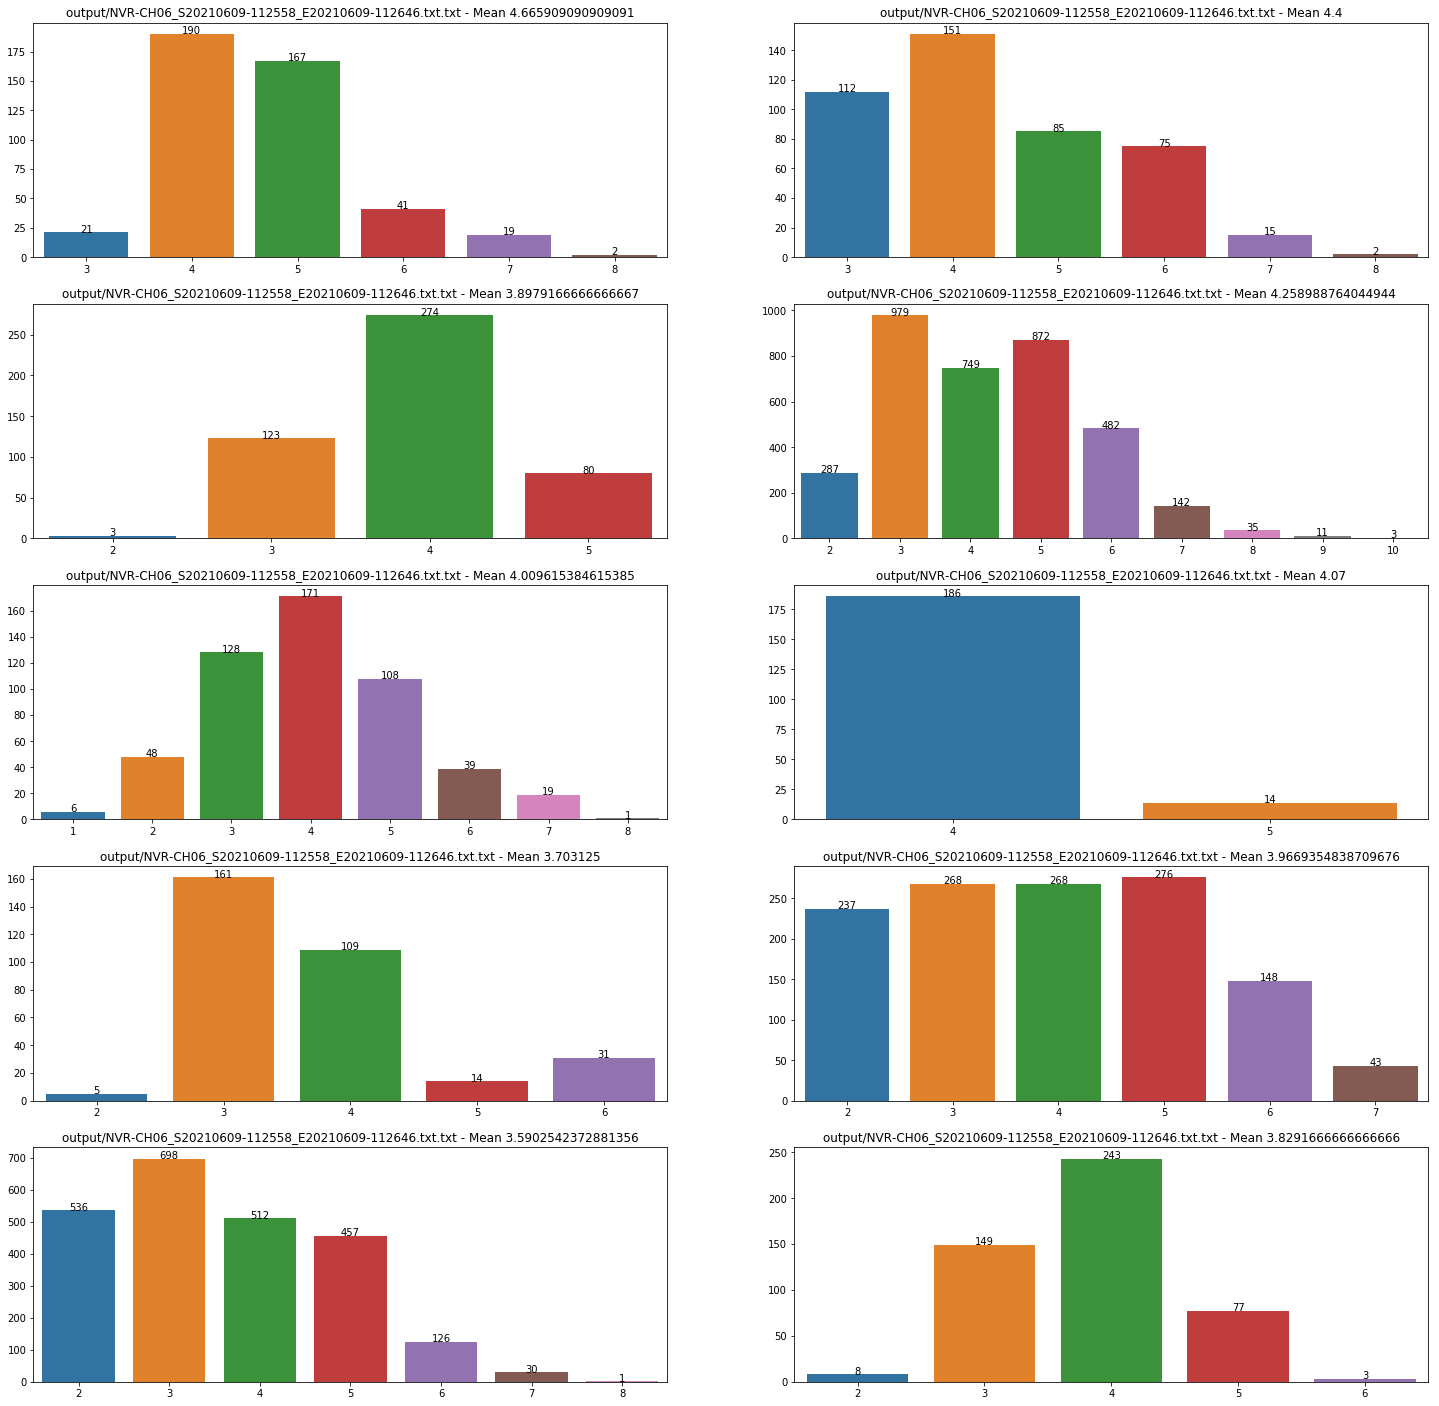

In [18]:
vis_obj_count(paths[:10],"static/ignore_region/CH06.json", False)

In [19]:
len(paths)

92

In [20]:
def vis_obj_count_merge(files, channel_file, ignore_region=False):
    info = get_channel_info(channel_file) # get info about frame size and ignore region of this channel
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{}'.format(int(p.get_height()))
            ax.text(_x, _y, value, ha="center") 
    
    def handler(file):
        data = []
        spliter = None
        with open(file, "rt") as f:
            for line in f:
                if(spliter is None):
                    spliter = " " if len(line.split(" ")) > 3 else ","
                line = line.strip().split(spliter)
                
                if(ignore_region):
                    if(filter_region(line, info, 'iou')):
                        continue
                        
                data.append(line)

        group_frames = defaultdict(int)
        for d in data:
            group_frames[int(d[0])] += 1

        group_count = defaultdict(int)
        for k, v in group_frames.items():
            group_count[v] += 1
        
        return group_count
    
    if(not isinstance(files, list)):
        files = [files]
        
    vis_data = []
    for file in files:
        vis_data.append(handler(file))
    
    merge_dict = {}
    for d in vis_data:
        for k, v in d.items():
            if k not in merge_dict:
                merge_dict[k] = v
            else:
                merge_dict[k] += v
    
    
    num_peoples = np.asarray(list(merge_dict.keys()))
    num_frames = np.asarray(list(merge_dict.values()))
    
    plt.figure(figsize=(15, 10))
    ax = sns.barplot(x=num_peoples, y=num_frames)
    _show_on_single_plot(ax)

    plt.show()

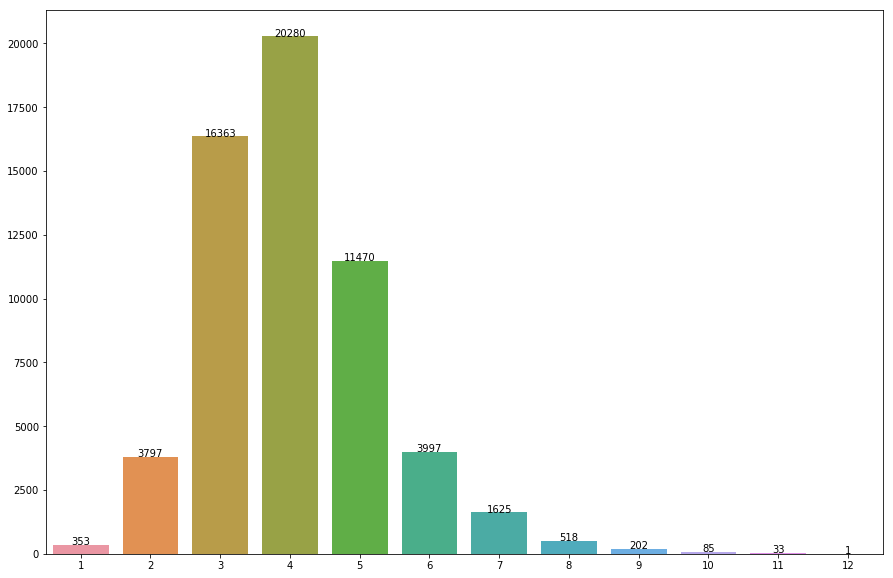

In [21]:
vis_obj_count_merge(paths, "static/ignore_region/CH06.json", False)

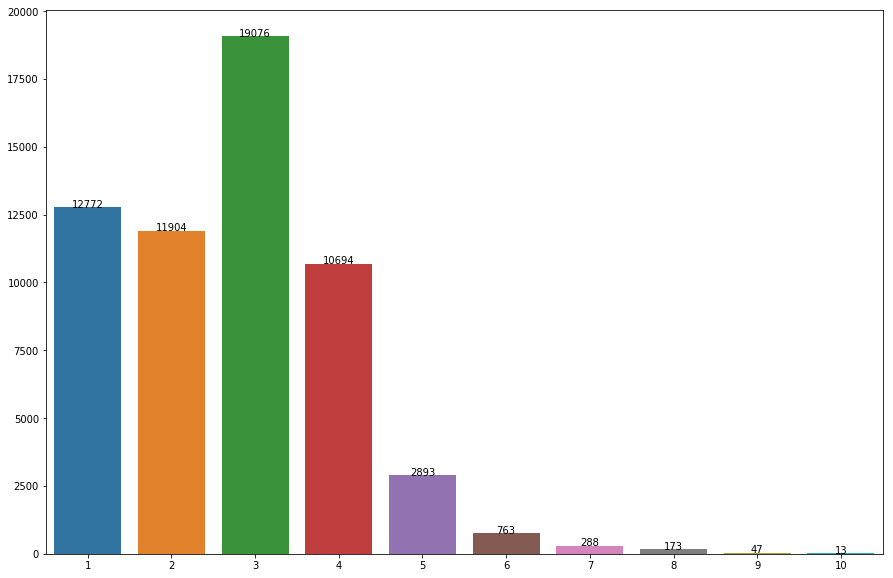

In [22]:
vis_obj_count_merge(paths, "static/ignore_region/CH06.json", True)